# KMeans Clustering

**author** : Germain Forestier (germain.forestier@uha.fr)

KMeans is a clustering algorithm that identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.



## **Exercise 1**: Exploring the Iris Dataset

In this exercise sequence, we start by loading and visualizing the Iris dataset to understand its structure. We then apply KMeans clustering to investigate the impact of varying cluster counts on performance, measured by the adjusted Rand index. Finally, in Part 3, we examine how different feature pairings affect cluster visualization, highlighting the influence of feature selection on perceived clustering effectiveness



### Part 1: Loading and Visualizing the Data

Begin by loading the Iris dataset to familiarize yourself with its structure and basic plotting. This exercise will help you understand the data before applying KMeans clustering.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# TODO: Plot the sepal length vs sepal width
# Use plt.scatter() to create a scatter plot
# Set appropriate labels and title using plt.xlabel(), plt.ylabel(), plt.title()


 #### Correction:


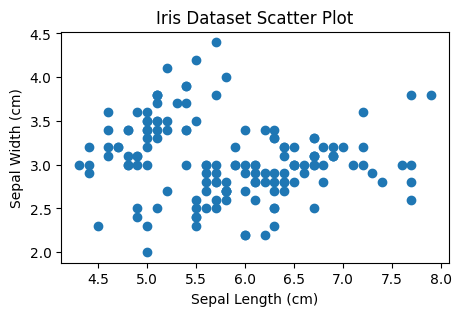

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Plotting the sepal length vs sepal width
plt.figure(figsize=(5, 3))
plt.scatter(iris_df['sepal length (cm)'], iris_df['sepal width (cm)'])
plt.title('Iris Dataset Scatter Plot')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


### Part 2: Experimenting with KMeans Clustering

**Objective**: Understand the impact of changing the number of clusters on clustering performance using the Rand index.

**Task Overview**: Implement KMeans clustering to vary the number of clusters from 1 to 10. Analyze the performance by calculating and plotting the adjusted Rand index for each configuration.

**Instructions**:
1. Initialize and fit a KMeans model within a loop that adjusts the number of clusters.
2. Compute and record the adjusted Rand index for each number of clusters.
3. Visualize the results to identify the optimal cluster count.



In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

# TODO: Create a loop to vary the number of clusters from 1 to 10
# Inside the loop, initialize KMeans, fit the model, and calculate the adjusted Rand index
# Plot the results (number of clusters vs Rand index)

# HINT: Initialize the plot before the loop
# HINT: Use adjusted_rand_score from sklearn.metrics to calculate the Rand index


 #### Correction:


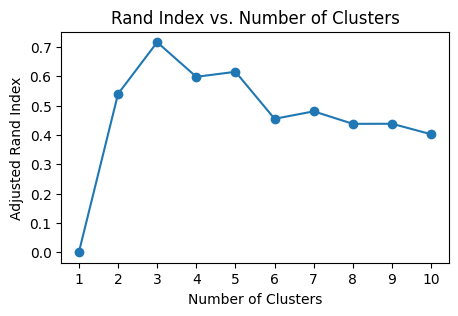

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

rand_indices = []
cluster_range = range(1, 11)

# Initialize the plot
plt.figure(figsize=(5, 3))

for k in cluster_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(iris_df)
    clusters = model.predict(iris_df)

    # Calculating the Rand index
    if k > 1:  # Rand index calculation is meaningful when k > 1
        rand_index = adjusted_rand_score(iris.target, clusters)
        rand_indices.append(rand_index)
    else:
        rand_indices.append(0)  # No clustering possible with k=1

# Plotting the Rand index values
plt.plot(cluster_range, rand_indices, marker='o')
plt.title('Rand Index vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Adjusted Rand Index')
plt.xticks(cluster_range)
plt.show()


### Part 3: Visualizing Different 2D Combinations of Features

**Objective**: Explore how different pairs of features from the Iris dataset influence the visual outcomes of KMeans clustering.

**Task Overview**: Using the results of a KMeans model with three clusters, you will plot each pair of the dataset's four features. This visualization will help you see how the choice of features can affect the perception of cluster boundaries and cohesion.

**Instructions**:
1. Use the cluster labels obtained from the previous KMeans clustering.
2. Plot each combination of two features as a scatter plot, coloring points by their cluster assignment.
3. Assess how different feature pairs either clarify or obscure the clustering structure.



In [ ]:
import itertools
from sklearn.cluster import KMeans
import seaborn as sns

# Perform KMeans clustering with 3 clusters (reuse model from Part 2 or re-initialize if needed)
model = KMeans(n_clusters=3, random_state=42)
model.fit(iris_df)

# Get the cluster labels
labels = model.labels_

# TODO: Create pairwise scatter plots for different 2D combinations of features
# HINT: Use itertools.combinations to generate combinations of feature names
# HINT: Use seaborn's sns.scatterplot for plotting, with hue set to the cluster labels

# Initialize the combination list of features
feature_combinations = list(itertools.combinations(iris_df.columns, 2))

# Plot each combination
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Adjust the subplot layout as needed
axes = axes.flatten()

for i, (feat_x, feat_y) in enumerate(feature_combinations):
    # TODO: Plot each pair of features in a subplot
    # Use ax=axes[i] to specify which subplot to use for each pair


 #### Correction:


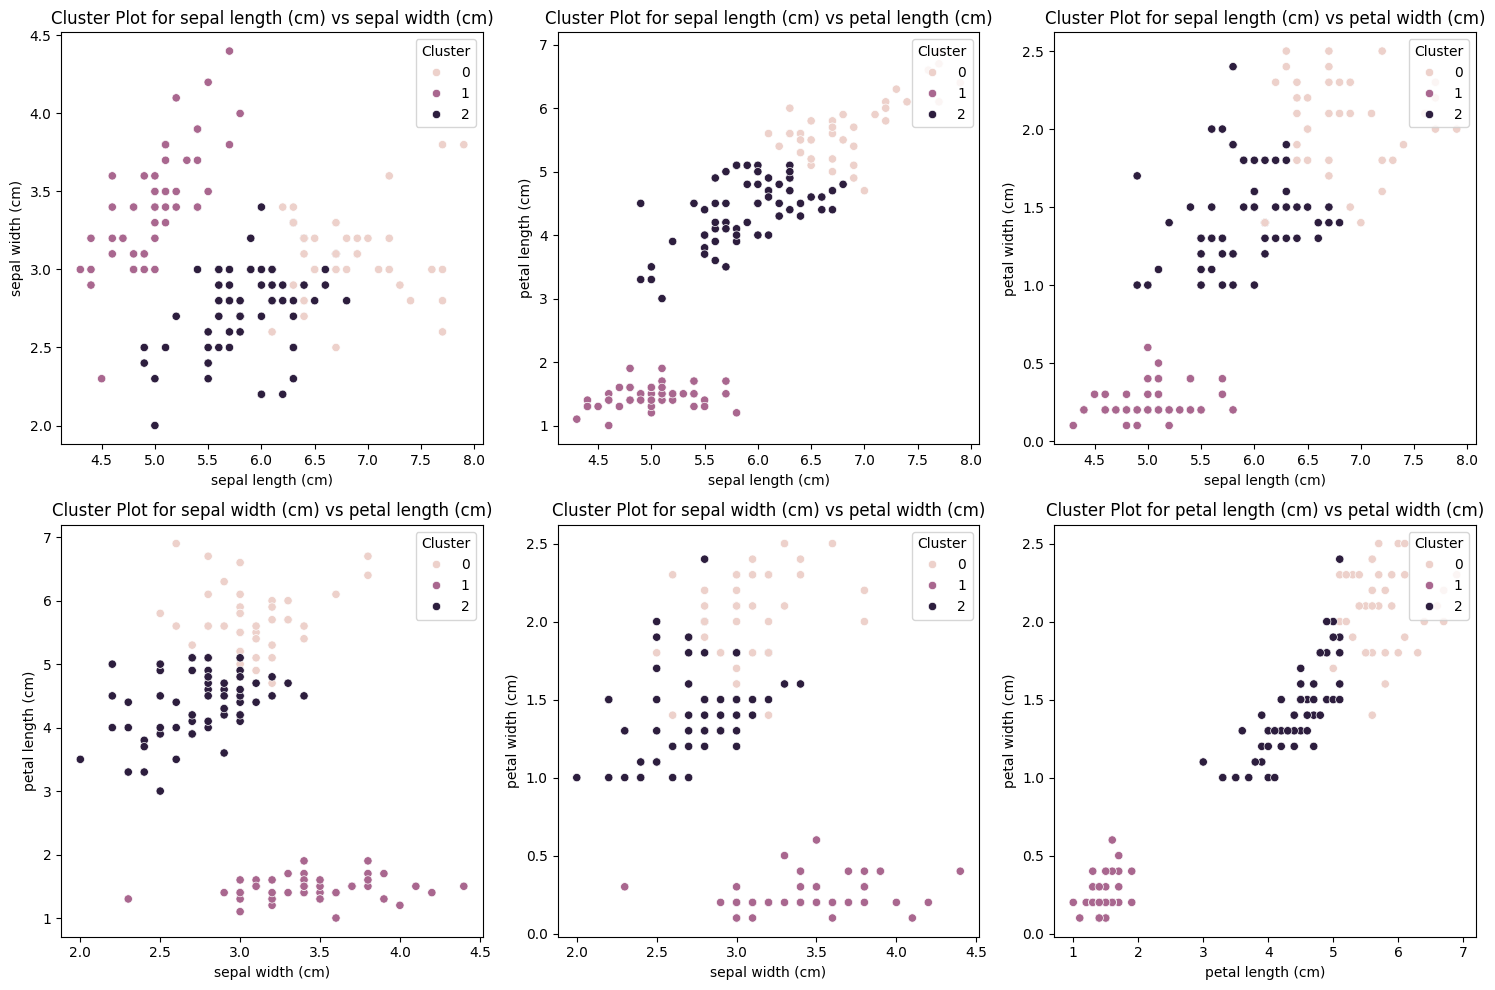

In [ ]:
import itertools
from sklearn.cluster import KMeans
import seaborn as sns

# Perform KMeans clustering with 3 clusters
model = KMeans(n_clusters=3, random_state=42)
model.fit(iris_df)

# Get the cluster labels
labels = model.labels_

# Create pairwise scatter plots for different 2D combinations of features
feature_combinations = list(itertools.combinations(iris_df.columns, 2))

# Plot each combination
fig, axes = plt.subplots(2, 3, figsize=(15, 10)) # Adjust the subplot layout as needed
axes = axes.flatten()

for i, (feat_x, feat_y) in enumerate(feature_combinations):
    sns.scatterplot(x=iris_df[feat_x], y=iris_df[feat_y], hue=labels, ax=axes[i])
    axes[i].set_title(f'Cluster Plot for {feat_x} vs {feat_y}')
    axes[i].legend(title='Cluster', loc='upper right')

plt.tight_layout()
plt.show()


## **Exercise 2**: Unsupervised Digit Recognition

We will start by loading the digits dataset, which consists of 1,797 samples, each with 64 features corresponding to the brightness of one pixel in an 8x8 image. Our goal is to use k-means clustering to identify groups of similar digits and visualize the typical digit from each cluster.


### Part 1: Load the Dataset and Initialize Clustering

Begin by loading the dataset to understand its structure, then initialize and apply k-means clustering to find patterns without using label information.


In [ ]:
from sklearn.datasets import load_digits

# TODO: Load the digits dataset and explore its shape
digits = load_digits()
# print the shape of digits.data

# TODO: Initialize and fit the KMeans algorithm with 10 clusters
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=10, random_state=0)
# clusters = kmeans.fit_predict(digits.data)


 #### Correction:


In [ ]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

# Load the digits dataset
digits = load_digits()
print("Dataset shape:", digits.data.shape)

# Initialize and perform KMeans clustering with 10 clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
print("Cluster centers shape:", kmeans.cluster_centers_.shape)


Dataset shape: (1797, 64)
Cluster centers shape: (10, 64)


### Part 2: Visualize the Cluster Centers

**Description**: Visualize the centers of the clusters to see if the unsupervised model can capture the essence of each digit, based on the cluster's average features.


In [ ]:
import matplotlib.pyplot as plt

# TODO: Reshape cluster centers and plot them
# HINT: Cluster centers can be reshaped to (10, 8, 8) for visualization
# Use plt.subplots and loop through each center to display them using imshow with cmap=plt.cm.binary


 #### Correction:


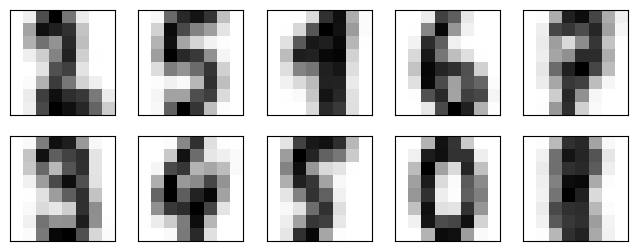

In [ ]:
import matplotlib.pyplot as plt

# Plotting the cluster centers as 8x8 images
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])  # Remove ticks
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)
plt.show()


### Part 3: Evaluate Clustering and Visualize Confusion Matrix

Assess the accuracy of the k-means clustering model by matching the unsupervised cluster labels with the true digit labels and visualizing the results with a confusion matrix.


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
from scipy.stats import mode

# TODO: Match cluster labels with true labels and evaluate clustering accuracy
# HINT: Use mode to find the most frequent true label in each cluster
# labels = np.zeros_like(clusters)
# for i in range(10):
#     mask = (clusters == i)
#     labels[mask] = mode(digits.target[mask])[0].mode


 #### Correction:


Clustering accuracy: 0.9415692821368948


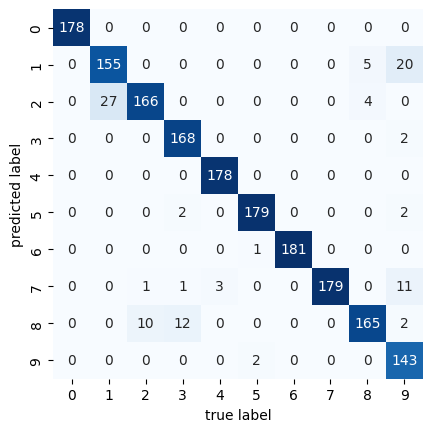

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import numpy as np
from scipy.stats import mode

# Matching cluster labels with true labels to evaluate accuracy
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

accuracy = accuracy_score(digits.target, labels)
print("Clustering accuracy:", accuracy)

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


### Part 4: Enhancing Clustering with t-SNE

This exercise involves using t-SNE to preprocess the digits dataset for enhanced clustering results with KMeans. Follow the steps to transform the data, perform clustering, and visualize the results.



**In the next step**:
1. Use t-SNE to reduce the dimensionality of the digits dataset.
2. Cluster the t-SNE transformed data using KMeans.
3. Compute the clustering accuracy to see how well the KMeans clustering has performed on the t-SNE transformed data.


In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random',
            learning_rate='auto',random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters

# Permute the labels

# Compute the accuracy

 #### Correction:

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random',
            learning_rate='auto',random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

0.9415692821368948

### Part 4: Visualizing t-SNE data space

**In the next step**:
1. Visualize the clustering output using a scatter plot.

In [ ]:
# Visualize the results with colors for each cluster

 #### Correction:

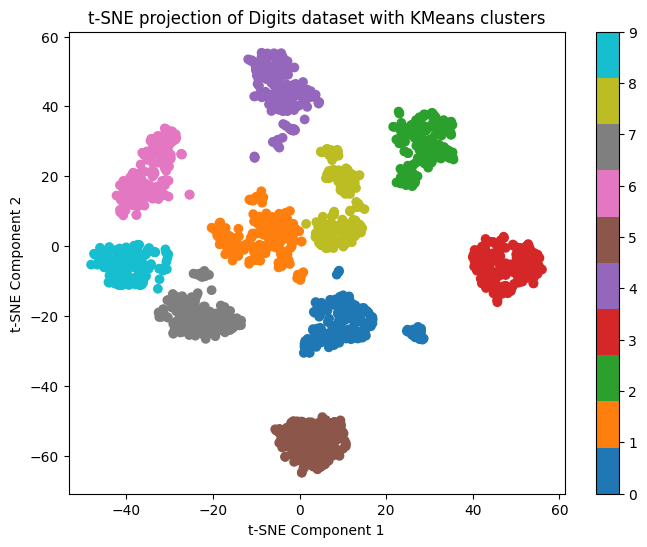

In [ ]:
# Visualize the results with colors for each cluster
plt.figure(figsize=(8, 6))
scatter = plt.scatter(digits_proj[:, 0], digits_proj[:, 1], c=clusters, cmap='tab10')
plt.colorbar(scatter)
plt.title('t-SNE projection of Digits dataset with KMeans clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

Bonus: You can try to display the centroid of each cluster as small images located at the coordinate of center in the T-SNE projection

## **Exercise 3**: k-Means for Color Compression

One interesting application of clustering is in color compression within images (this example is adapted from Scikit-Learn's "Color Quantization Using K-Means"). For example, imagine you have an image with millions of colors. In most images, a large number of the colors will be unused, and many of the pixels in the image will have similar or even identical colors.

### Part 1: Loading and Visualizing the Image

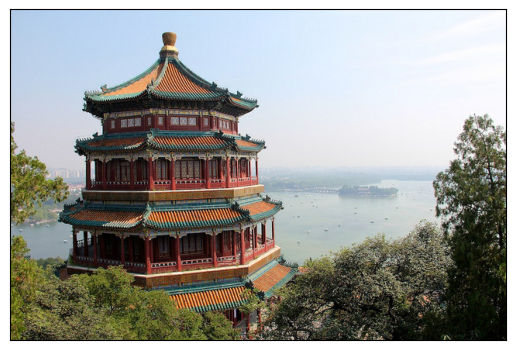

In [ ]:
# Note: this requires the PIL package to be installed
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

The image itself is stored in a three-dimensional array of size (height, width, RGB), containing red/blue/green contributions as integers from 0 to 255:

In [ ]:
china.shape

(427, 640, 3)

One way we can view this set of pixels is as a cloud of points in a three-dimensional color space. We will reshape the data to [n_samples, n_features] and rescale the colors so that they lie between 0 and 1:

In [ ]:
data = china / 255.0  # use 0...1 scale
data = data.reshape(-1, 3)
data.shape

(273280, 3)

### Part 2: Visualizing the Image in the RGB

We can visualize these pixels in this color space, using a subset of 10,000 pixels for efficiency (see the following figure):

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    # plot the pixels in the RGB space

# plot_pixels(data, title='Input color space: 16 million possible colors')

 #### Correction:

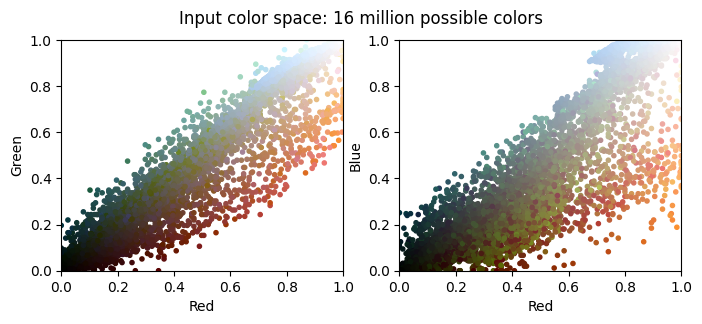

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.default_rng(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title);

plot_pixels(data, title='Input color space: 16 million possible colors')

### Part 3: Color compression using KMeans

Now let's reduce these 16 million colors to just 16 colors, using a k-means clustering across the pixel space. Because we are dealing with a very large dataset, we will use the mini-batch k-means, which operates on subsets of the data to compute the result (shown in the following figure) much more quickly than the standard k-means algorithm:

In [ ]:
from sklearn.cluster import MiniBatchKMeans
# Apply KMeans on the image

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

 #### Correction:

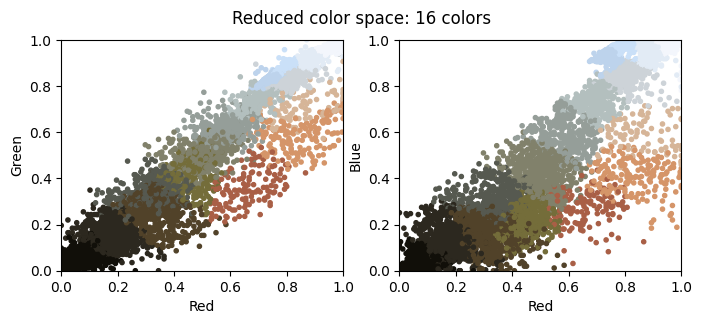

In [ ]:
from sklearn.cluster import MiniBatchKMeans
# Apply KMeans on the image
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 16 colors")

### Part 4: Display the result in the image space

The result is a recoloring of the original pixels, where each pixel is assigned the color of its closest cluster center. Plotting these new colors in the image space rather than the pixel space shows us the effect of this (see the following figure):

In [ ]:
china_recolored = new_colors.reshape(china.shape)

# display the original image and the compressed image side by side

 #### Correction:

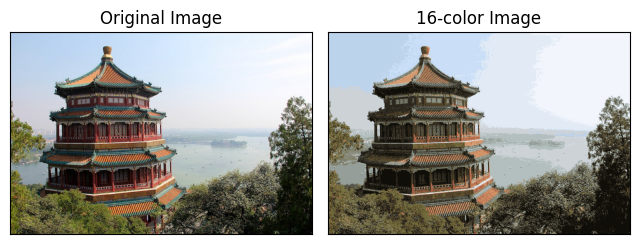

In [ ]:
china_recolored = new_colors.reshape(china.shape)

# display the original image and the compressed image side by side
fig, ax = plt.subplots(1, 2, figsize=(8, 3),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image')
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image');

Some detail is certainly lost in the rightmost panel, but the overall image is still easily recognizable. In terms of the bytes required to store the raw data, the image on the right achieves a compression factor of around 1 million! Now, this kind of approach is not going to match the fidelity of purpose-built image compression schemes like JPEG, but the example shows the power of thinking outside of the box with unsupervised methods like k-means.

## **Exercise 4**: Sports Analytics: Uncovering Football Pass Patterns with KMeans Clustering

In this exercise, we will use KMeans clustering to analyze and group football players' pass trajectories, identifying common patterns in their movements. By cleaning and clustering the trajectories, we aim to uncover strategic tendencies in passing behavior.

### Part 1: Getting the data

We start by getting the data from statsbomb open-data.

In [ ]:
import requests

# Statsbomb's competition 43 is the World Cup
match_info_url = "https://raw.githubusercontent.com/statsbomb/open-data/refs/heads/master/data/matches/43/54.json"

# Pull data from url into python dictionary
games = requests.get(url=match_info_url).json()

# Use list comprehension to create a list of match ids
match_ids = [g['match_id'] for g in games]

print(match_ids)

[3889149, 3889148, 3750191]


We create a "Pass" object to decode the data stored in the json file.

In [ ]:
# Build a Python Class for handling Pass Data
class Pass(object):
    def __init__(self, **kwargs):
        for key, value in kwargs.items():
            setattr(self, key, value)

    # This method is useful later for creating training data for clustering
    def vector(self):
        return [self.x, self.end_x, self.y, self.end_y]

In [ ]:
data_store = {}

# template URL at which each game's event data is stored
match_data_url = "https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/{}.json"

# This takes some time, naturally
for match_id in match_ids:

    # Empty List for each game
    data_store[match_id] = []

    # Get all events from a particular game
    all_events = requests.get(url=match_data_url.format(match_id)).json()

    # Filter them by type-name Pass
    passes = [x for x in all_events if x['type']['name'] == "Pass"]
    for p in passes:

        # Store attributes in dictionary
        attributes = {
            "team": p["possession_team"]["name"],
            "possession_id": p["possession"],
            "x": p['location'][0],
            "y": p['location'][1],
            "end_x": p['pass']['end_location'][0],
            "end_y": p['pass']['end_location'][1]
        }

        # Construct Pass object from attribute keywords and store
        data_store[match_id].append(Pass(**attributes))

### Part 2: Visualizing the data

Now that we have the data, write a code to display all the passes from the Argentina vs. Germany 1986 WorldCup final (match_id 3889149), stored in the data_store.

In [ ]:
import matplotlib.pyplot as plt

# Argentina vs. Germany 1986 final WorldCup

# Plot all passes from single game

 #### Correction:

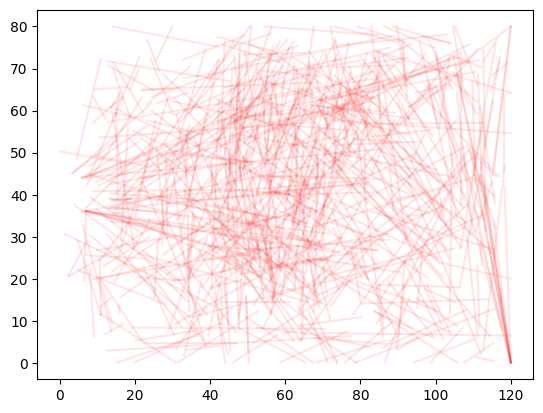

In [ ]:
import matplotlib.pyplot as plt

match_id = 3889149 # Argentina vs. Germany 1986 final WorldCup

# Plot all passes from single game
for p in [p for p in data_store[match_id]]:
    plt.plot([p.x, p.end_x],[p.y, p.end_y], c='red', alpha=0.1)
plt.show()


### Part 3: Clustering the data

Now that we have the data, we will use KMeans to create group of passes and represent each group by its centroid.

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Create training data for clustering

# Perform the clustering on the training data
# Create 20 clusters

# Display the result


 #### Correction:

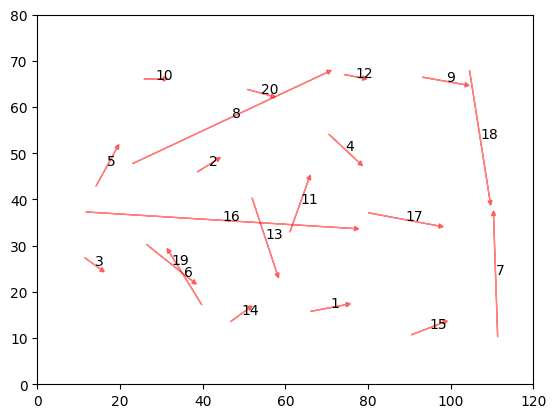

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

# Create training data for clustering
training_data = []
for match_id, passes in data_store.items():
    for p in passes:
        # For each pass, use the vector method
        training_data.append(p.vector())

# Perform the clustering on the training data
# 49 is mostly arbitrary, first index is used for end-of-sequence in later analysis
cluster_model = KMeans(n_clusters=20).fit(training_data)

# Display the result
for i, (x, end_x, y, end_y) in enumerate(cluster_model.cluster_centers_):
    plt.arrow(x, y, end_x-x, end_y-y,
              head_width=1,
              head_length=1,
              color='red',
              alpha=0.5,
              length_includes_head=True)

    plt.text((x+end_x)/2, (y+end_y)/2, str(i+1))

plt.xlim(0,120)
plt.ylim(0,80)
plt.show()

### Part 4: Plotting each cluster

Now plot each cluster in a different plot, display the different data of each clustering and its corresponding centroid.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Create training data for clustering

# Perform clustering on the training data

# Predict cluster labels for the training data

# Set up a grid of 5 columns and 4 rows

# Iterate through each cluster
for cluster_num in range(n_clusters):
    # Get all passes belonging to this cluster

    # Calculate row and column index for subplot

    # Plot the passes for this cluster)

    # Plot the centroid (cluster center)

    # Set limits and title for each subplot

# Adjust layout for better spacing


 #### Correction:

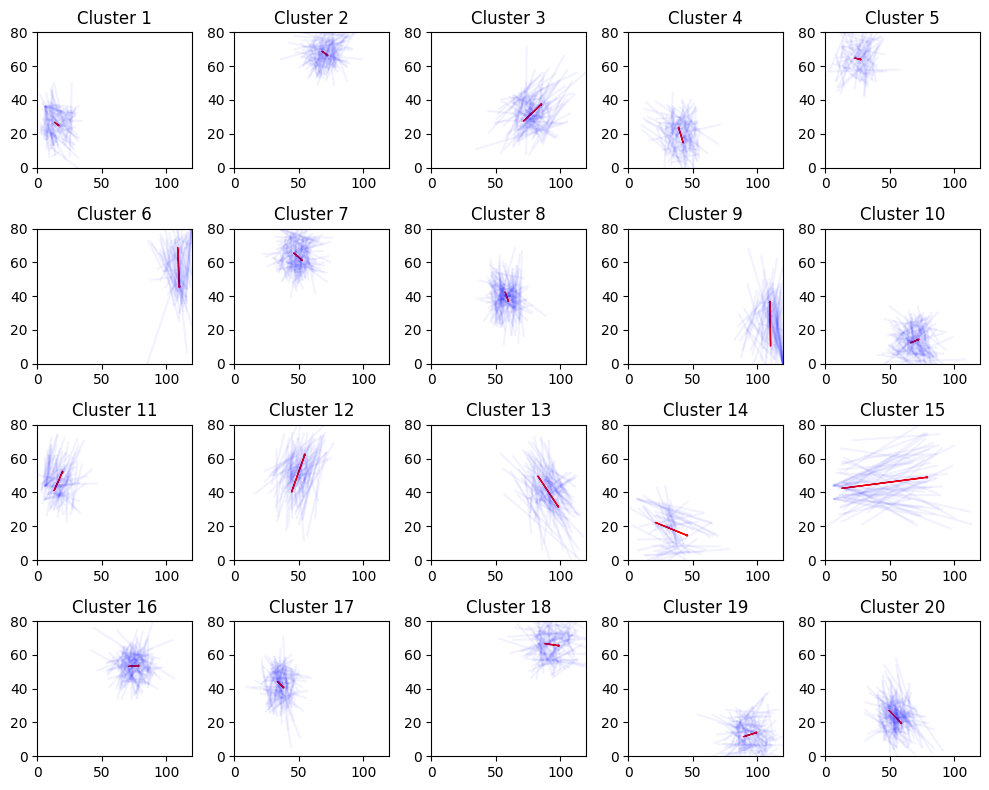

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Create training data for clustering
training_data = []
for match_id, passes in data_store.items():
    for p in passes:
        training_data.append(p.vector())

# Perform clustering on the training data
n_clusters = 20
cluster_model = KMeans(n_clusters=n_clusters).fit(training_data)

# Predict cluster labels for the training data
labels = cluster_model.predict(training_data)

# Set up a grid of 5 columns and 4 rows
fig, axs = plt.subplots(4, 5, figsize=(10, 8))

# Iterate through each cluster
for cluster_num in range(n_clusters):
    # Get all passes belonging to this cluster
    cluster_passes = np.array(training_data)[labels == cluster_num]

    # Calculate row and column index for subplot
    row = cluster_num // 5
    col = cluster_num % 5

    # Plot the passes for this cluster
    for p in cluster_passes:
        axs[row, col].plot([p[0], p[1]], [p[2], p[3]], c='blue', alpha=0.05)

    # Plot the centroid (cluster center)
    centroid = cluster_model.cluster_centers_[cluster_num]
    axs[row, col].arrow(centroid[0], centroid[2], centroid[1] - centroid[0], centroid[3] - centroid[2],
                        head_width=1, head_length=1, color='red', alpha=1, length_includes_head=True)

    # Set limits and title for each subplot
    axs[row, col].set_xlim(0, 120)
    axs[row, col].set_ylim(0, 80)
    axs[row, col].set_title(f"Cluster {cluster_num + 1}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Now we will the mplsoccer package to display the football field with the data.

In [ ]:
# install the required package
!pip install mplsoccer

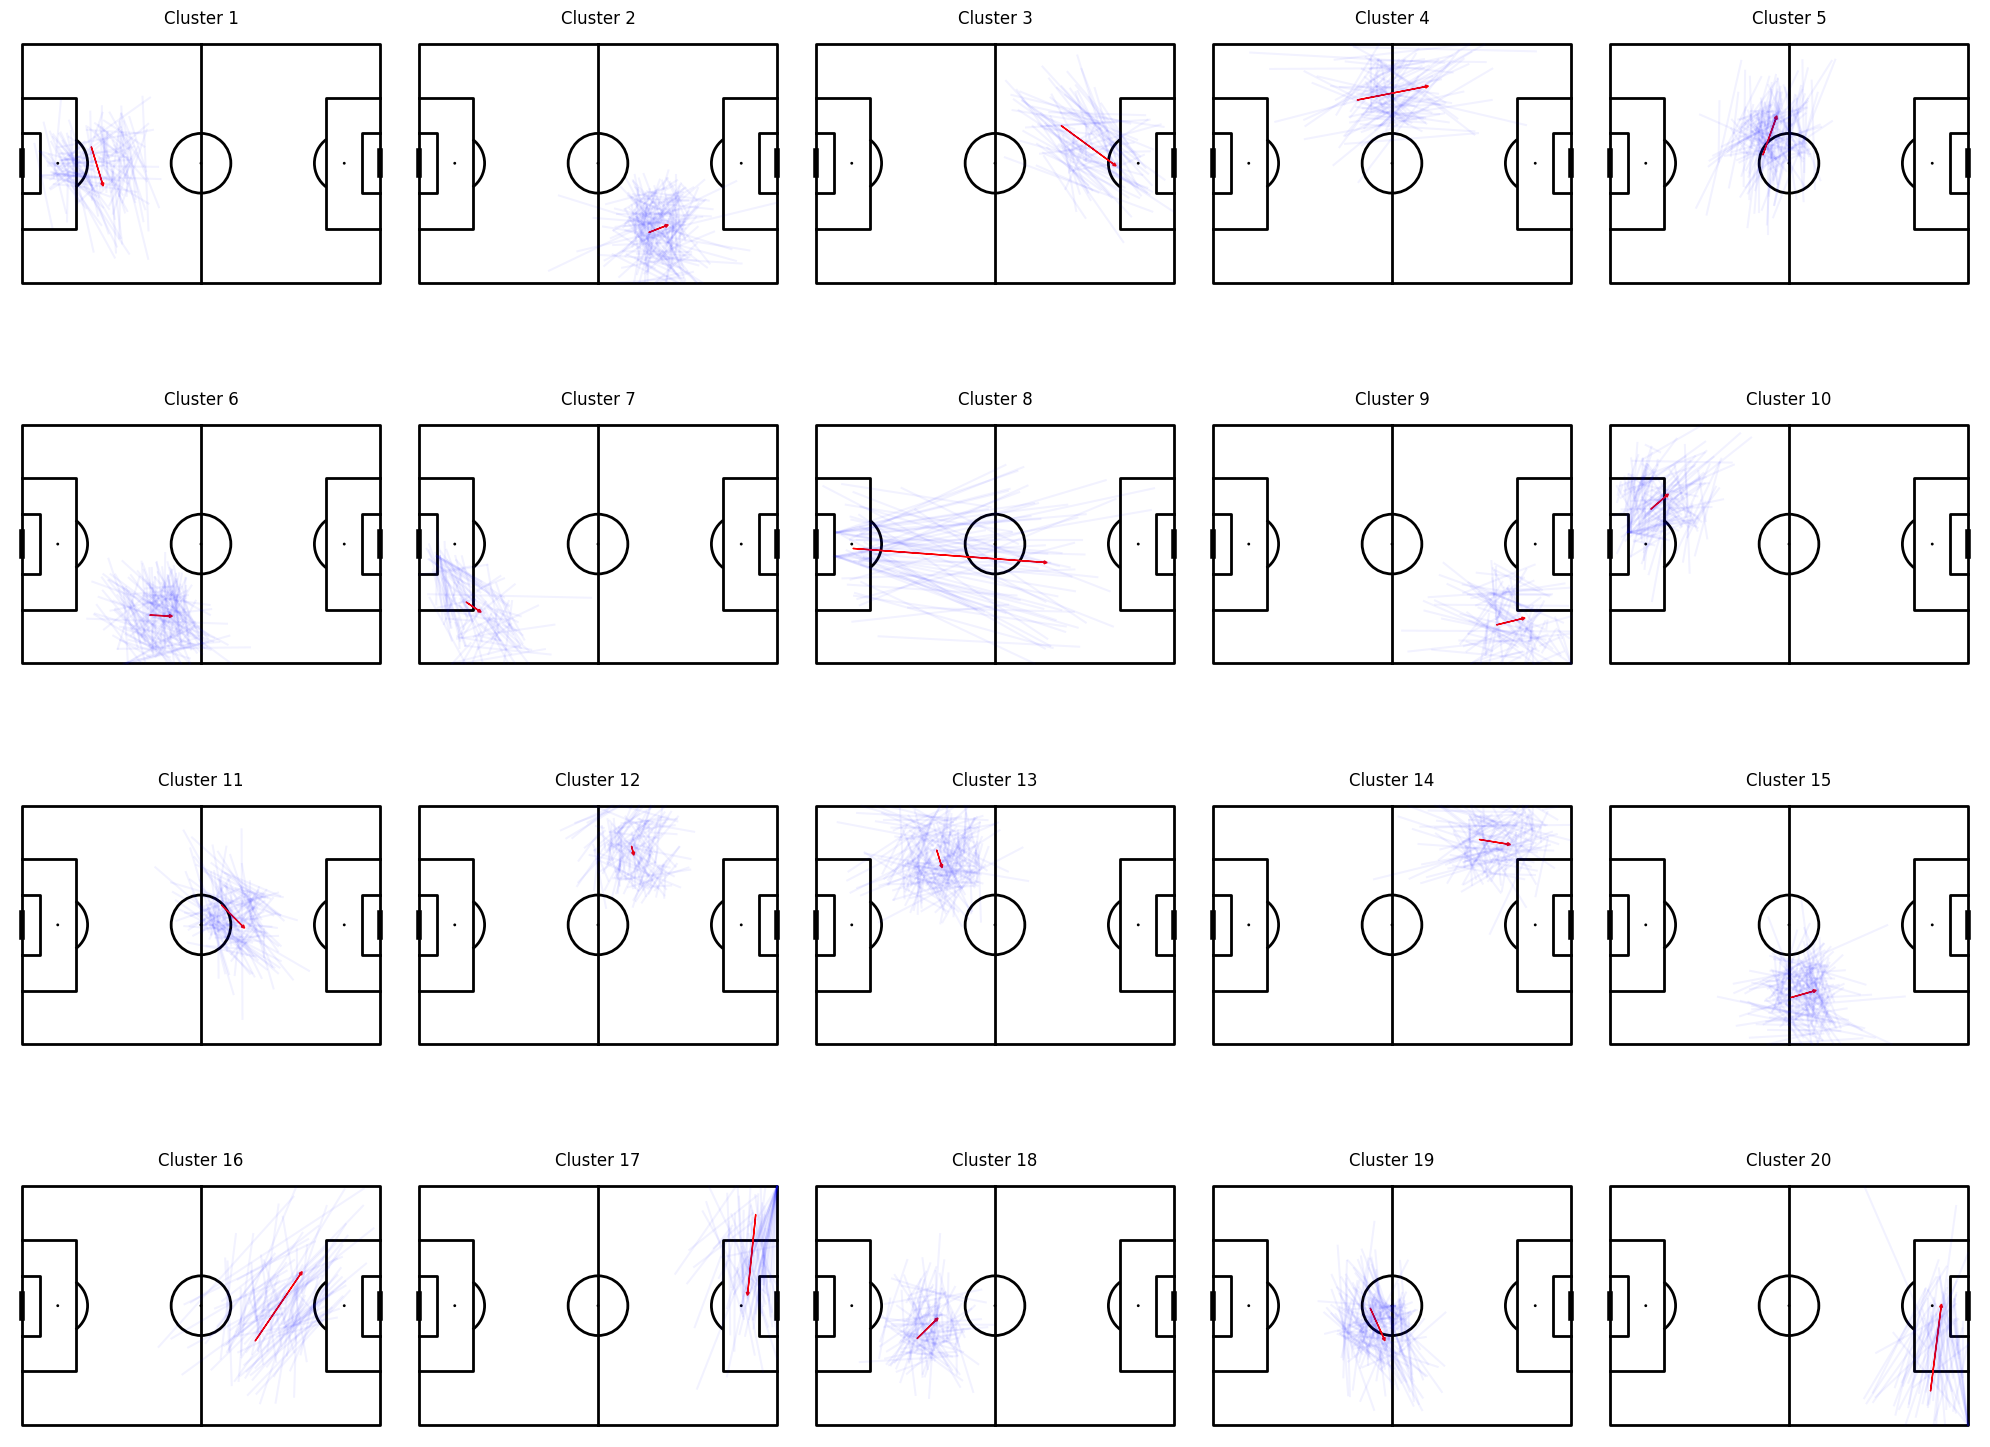

In [ ]:
from mplsoccer import Pitch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Create training data for clustering
training_data = []
for match_id, passes in data_store.items():
    for p in passes:
        training_data.append(p.vector())

# Perform clustering on the training data
n_clusters = 20
cluster_model = KMeans(n_clusters=n_clusters).fit(training_data)

# Predict cluster labels for the training data
labels = cluster_model.predict(training_data)

# Set up a 5x4 grid of soccer pitches
fig, axs = plt.subplots(4, 5, figsize=(20, 16))

# Create a soccer pitch (white background, black lines)
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_color='black')

# Iterate through each cluster
for cluster_num in range(n_clusters):
    # Get all passes belonging to this cluster
    cluster_passes = np.array(training_data)[labels == cluster_num]

    # Calculate row and column index for subplot
    row = cluster_num // 5
    col = cluster_num % 5

    # Draw the pitch on each subplot
    pitch.draw(ax=axs[row, col])

    # Plot the passes for this cluster
    for p in cluster_passes:
        axs[row, col].plot([p[0], p[1]], [p[2], p[3]], c='blue', alpha=0.05)

    # Plot the centroid (cluster center)
    centroid = cluster_model.cluster_centers_[cluster_num]
    axs[row, col].arrow(centroid[0], centroid[2], centroid[1] - centroid[0], centroid[3] - centroid[2],
                        head_width=1, head_length=1, color='red', alpha=1, length_includes_head=True)

    # Set title for each subplot
    axs[row, col].set_title(f"Cluster {cluster_num + 1}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
